In [13]:
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pickle

In [8]:
df = pd.read_csv('../data/preprocessed.csv')

In [9]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.5,1
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0,1
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,1
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0
...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0,0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,1
888,1.0,0.0,0.367932,0.125,0.333333,0.045771,1.0,0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.5,1


In [10]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
y = df['y'].values

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8)

In [14]:
#Deep learning model

model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[7]),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation ='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=8,
    epochs=50,
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.3985
Best Validation Accuracy: 0.8324


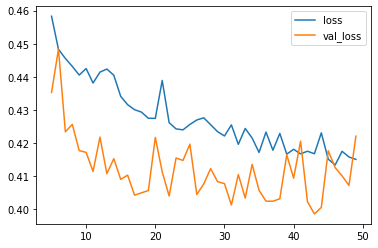

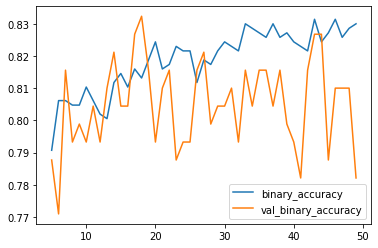

In [15]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [16]:
weigh= model.get_weights()
p = open('../static/models/nn_weigh.pkl','wb')
pickle.dump(weigh,p)
p.close()

In [18]:
#Naive Bayes multinomial
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB().fit(X_train, y_train)
print("score on test: " + str(mnb.score(X_val, y_val)))
print("score on train: "+ str(mnb.score(X_train, y_train)))

score on test: 0.6759776536312849
score on train: 0.6825842696629213


In [19]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print("score on test: " + str(lr.score(X_val, y_val)))
print("score on train: "+ str(lr.score(X_train, y_train)))

score on test: 0.7932960893854749
score on train: 0.7991573033707865


In [20]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)
knn.fit(X_train, y_train)

print("score on test: " + str(knn.score(X_val, y_val)))
print("score on train: "+ str(knn.score(X_train, y_train)))

score on test: 0.8100558659217877
score on train: 0.848314606741573


In [21]:
#SVM Model
from sklearn.svm import LinearSVC

svm=LinearSVC(C=0.0002)
svm.fit(X_train, y_train)

print("score on test: " + str(svm.score(X_val, y_val)))
print("score on train: "+ str(svm.score(X_train, y_train)))

score on test: 0.6145251396648045
score on train: 0.6165730337078652


In [22]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("score on test: " + str(clf.score(X_val, y_val)))
print("score on train: "+ str(clf.score(X_train, y_train)))

score on test: 0.7988826815642458
score on train: 0.9859550561797753


In [23]:
#Bagging with DecisionTree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(X_train, y_train)
print("score on test: " + str(bg.score(X_val, y_val)))
print("score on train: "+ str(bg.score(X_train, y_train)))

score on test: 0.8379888268156425
score on train: 0.9115168539325843


In [24]:
#AdaBoost with DecisionTree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(X_train, y_train)
print("score on test: " + str(adb.score(X_val, y_val)))
print("score on train: "+ str(adb.score(X_train, y_train)))

score on test: 0.7988826815642458
score on train: 0.9087078651685393


In [26]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
print("score on test: " + str(rf.score(X_val, y_val)))
print("score on train: "+ str(rf.score(X_train, y_train)))

score on test: 0.8491620111731844
score on train: 0.9185393258426966


In [28]:
rf.predict(X_val)

array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [27]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
# 1) naive bias = mnb
# 2) logistic regression =lr
# 3) random forest =rf
# 4) support vector machine = svm
evc=VotingClassifier(estimators=[('mnb',mnb),('lr',lr),('rf',rf),('svm',svm)],voting='hard')
evc.fit(X_train, y_train)
print("score on test: " + str(evc.score(X_val, y_val)))
print("score on train: "+ str(evc.score(X_train, y_train)))

score on test: 0.7039106145251397
score on train: 0.7036516853932584


In [19]:
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(7,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50,batch_size=16,validation_data=(X_val,y_val))
print("score on test: " + str(model.evaluate(X_val,y_val)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train)[1]))

Epoch 1/50
45/45 [==============================] - 4s 10ms/step - loss: 0.6781 - accuracy: 0.5787 - val_loss: 0.6403 - val_accuracy: 0.6313
Epoch 2/50
45/45 [==============================] - 0s 4ms/step - loss: 0.6240 - accuracy: 0.6194 - val_loss: 0.6001 - val_accuracy: 0.6704
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.6742 - val_loss: 0.5687 - val_accuracy: 0.7318
Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.7191 - val_loss: 0.5419 - val_accuracy: 0.7821
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5418 - accuracy: 0.7444 - val_loss: 0.5153 - val_accuracy: 0.7765
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7626 - val_loss: 0.4941 - val_accuracy: 0.7933
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7809 - val_loss: 0.4825 - val_accuracy: 0.7933
Epoch 8/50
45/45 [=

In [65]:
#Prediction Test data

In [108]:
test_data = pd.read_csv(r"D:\Learnings\kaggle-projects\titanic\data\test.csv")

In [92]:
feature_cols = ['Pclass','Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
labled_cols = ['Pclass', 'Age', 'SibSp','Parch', 'Fare']

In [93]:
test_data = test_data[feature_cols]

In [94]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [95]:
mean_age = round(test_data['Age'].mean(),2)
test_data['Age'].fillna(mean_age,inplace=True)

In [96]:
emb_mode = test_data['Embarked'].mode()
test_data['Embarked'].fillna(emb_mode[0],inplace=True)

In [97]:
mean_fare = round(test_data['Fare'].mean(),2)
test_data['Fare'].fillna(mean_fare,inplace=True)

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(test_data[labled_cols])
X_test_data = scaler.transform(test_data[labled_cols])

In [99]:
X_test = pd.DataFrame(X_test_data, columns = labled_cols)

In [100]:
X_test[['Sex','Embarked']] = test_data[['Sex','Embarked']] 

In [101]:
file_to_read = open(r"D:\Learnings\kaggle-projects\titanic\static\categorical_scaled_map.pickle", "rb")
loaded_dictionary = pickle.load(file_to_read)

In [102]:
X_test['Sex'] = X_test['Sex'].map(loaded_dictionary['Sex'])

In [103]:
X_test['Embarked'] = X_test['Embarked'].map(loaded_dictionary['Embarked'])

In [133]:
X_test = X_test[feature_cols]

In [134]:
X_test['Survived'] = lr.predict(X_test)

In [135]:
X_test['PassengerId'] = test_data['PassengerId']

In [136]:
X_test[['PassengerId','Survived']].to_csv('test_prediction_lr.csv', index=False)